# Basis functions
Basis function can be used to reduce the dimensionality of inputs and to incorporating priors like smoothness when fitting GLMs.
See [basics](basics.ipynb) and [multiple_inputs](multiple_inputs.ipynb) for usage them and the [source](../src/glm_utils/bases.py) for details.

Note: Generalized Additive models are a more principled way of using basis functions. See [pyGAM](https://pygam.readthedocs.io/en/latest/index.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glm_utils.bases
plt.style.use('ncb.mplstyle')

def plot_basis(B):
    T = np.arange(-B.shape[0],0)
    nb_bases = B.shape[1]
    
    plt.figure(figsize=(10, 10))
    plt.subplot(412)
    plt.imshow(B.T)
    plt.yticks(np.arange(nb_bases))
    plt.xticks(())
    plt.ylabel('Basis functions')
    
    plt.subplot(212)
    plt.plot(T, B)
    plt.xlabel('Time preceding response')
    plt.ylabel('Basis amplitude')
    plt.title(f'[time pts: {B.shape[0]}, bases: {B.shape[1]}]')
    

## Raised cosine basis

Uses a series of raised cosine bumps that broaden with the delay. This broading captures the fact that filters often are sharpest close to the response (small delays). This basis reduces the dimensionality of the inputs by adjusting the temporal resolution (density and width of basis functions) and produces smooth filters. Adopted from Pillow et al. (2008).

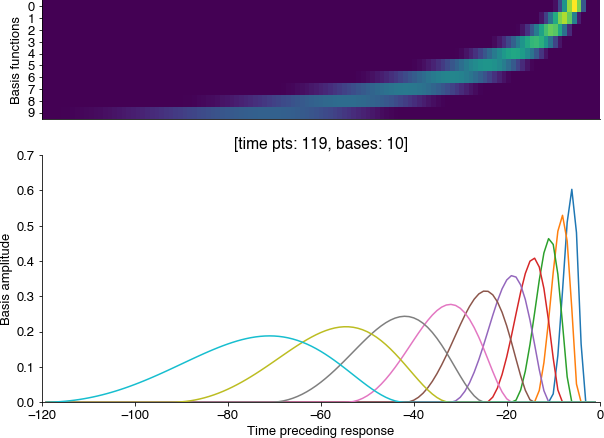

In [2]:
B = glm_utils.bases.raised_cosine(neye=0, ncos=10, kpeaks=(5, 70), b=2, nbasis=10)
plot_basis(B)

## Laplacian pyramid basis
Consists of Gaussian bumps of different half-width each of which densely tiles the time axis. This basis does not reduce dimensionality but is very powerful in combination with regularization, since the filter can be constructed from few basis functions. This is the basis function used in Coen et al. 2014. Adopted from Mineault et al. (2009).

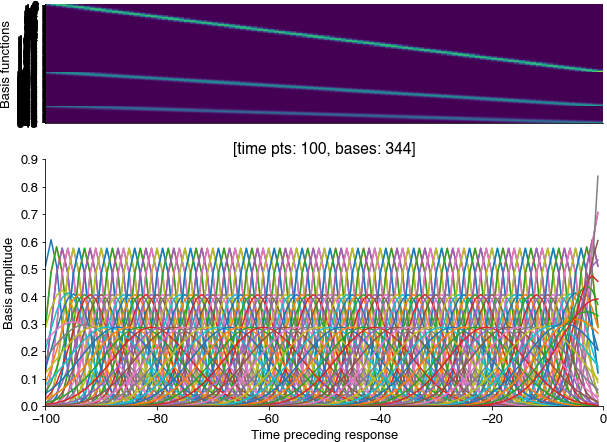

In [3]:
B = glm_utils.bases.laplacian_pyramid(width=100, levels=3, step=1, FWHM=8)
plot_basis(B)

## Comb basis
A simple basis that is equivalent to considering only every Nth time point for the filter. 

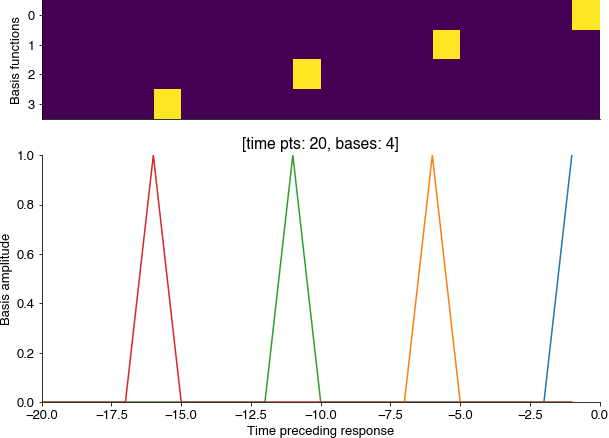

In [4]:
B = glm_utils.bases.comb(width=20, spacing=5)
plot_basis(B)

## Multi feature bases
A matrix that contains duplicates of the basis arranged along the main diagonal.

Text(0.5, 1.0, '3-feature basis [time pts: 119, bases: 10]')

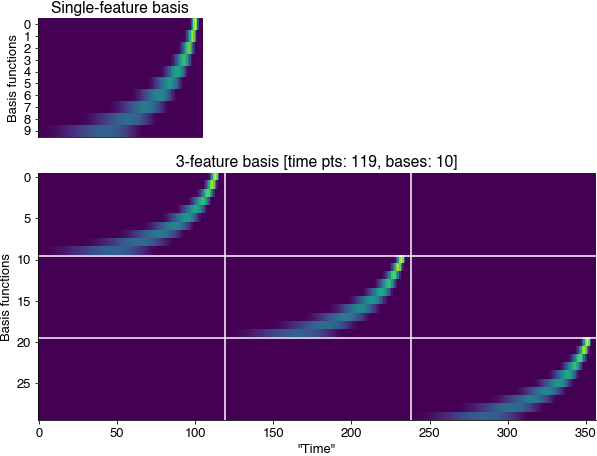

In [5]:
B = glm_utils.bases.raised_cosine(neye=0, ncos=10, kpeaks=(5, 70), b=2, nbasis=10)
B_multi = glm_utils.bases.multifeature_basis(B, nb_features=3)

nb_times, nb_bases = B.shape
T = np.arange(-nb_times,0)

plt.figure(figsize=(10, 10))
plt.subplot(434)
plt.imshow(B.T)
plt.yticks(np.arange(nb_bases))
plt.xticks(())
plt.ylabel('Basis functions')
plt.title('Single-feature basis')

plt.subplot(212)
plt.imshow(B_multi.T)
plt.axvline(nb_times, c='w')
plt.axvline(nb_times * 2, c='w')
plt.axhline(nb_bases - 0.5, c='w')
plt.axhline(nb_bases * 2 - 0.5, c='w')
plt.xlabel('"Time"')
plt.ylabel('Basis functions')
plt.title(f'3-feature basis [time pts: {B.shape[0]}, bases: {B.shape[1]}]')


## References
Pillow JW, Shlens J, Paninski L, Sher A, Litke AM, Chichilnisky EJ, Simoncelli EP (2008) Spatio-temporal correlations and visual signaling in a complete neuronal population. Nature 454: 995-999.

Coen et al. 2014

Mineault, P. J., Barthelmé, S. & Pack, C. C. Improved classification images with sparse priors in a smooth basis. Journal of Vision 9, 1–24  (2009).